# Project 1. 

We work with the data on participants of the Olympic Games over the past 120 years.

## Combining the data into one table (task 1)

In [1]:
import pandas as pd
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
from scipy.stats import kde, normaltest, mannwhitneyu
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
def merging_into_one_table(dir: Path, extension: str, separator: str) -> pd.core.frame.DataFrame:
    suitable_files = []
    df = None
    
    for file in os.listdir(dir):
        if file.endswith(extension):
            suitable_files.append(os.path.join(dir, file))
    
    if suitable_files:
        df = pd.read_csv(suitable_files[0], sep=separator)
        if len(suitable_files) > 1:
            for file in suitable_files[1:]:
                new_df = pd.read_csv(file, sep=separator)
                df = pd.concat([df, new_df], ignore_index=True)
    return df
   

In [3]:
data = merging_into_one_table("../data/athlete_events/", "csv", ",")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## EDA and data modification (task 2)

In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271115.000000,261639.000000,210943.000000,208239.000000,271108.000000
mean,68248.828641,25.557669,175.339760,70.702232,1978.378314
std,39022.303374,6.407296,10.524619,14.348878,29.877579
min,1.000000,10.000000,127.000000,7.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271115 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 31.0+ MB


**Change ID data type to object**

In [6]:
data['ID'] = data['ID'].astype(str)

**Remove duplicates**

In [7]:
data = data.drop_duplicates()

**Check object features**

In [8]:
object_features = data.select_dtypes(include='object').columns.tolist()
print(object_features)

['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [9]:
for feature in object_features:
    print(data[feature].value_counts())

106296    39
115354    38
119591    36
129196    32
89187     32
          ..
56990      1
56989      1
56988      1
56987      1
67786      1
Name: ID, Length: 135571, dtype: int64
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Alexandros Theofilakis      32
                            ..
Yuliya Anatolivna Kalina     1
Milan Kalina                 1
Jozef Kalina                 1
estmr Kalina                 1
Pierre-Georges LeClercq      1
Name: Name, Length: 134732, dtype: int64
M    195347
F     74379
G         2
Name: Sex, dtype: int64
United States    17598
France           11817
Great Britain    11264
Italy            10212
Germany           9230
                 ...  
Souriceau-38         1
Carabinier-5         1
Ducky-4              1
Ducky-16             1
Digby                1
Name: Team, Length: 1184, dtype: int64
USA    18604
FRA    12551
GBR    12115
ITA    10666
GER     9734
       ...  
SSD   

In [10]:
# there are "G" values in "Sex" feature - let's look at them

data[data["Sex"] == "G"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158593,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
158625,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN


In [11]:
# change them to "M" as they are obviously men

data["Sex"] = data["Sex"].replace(["G"], "M")

In [12]:
# change "Footba" to "Football"

data["Sport"] = data["Sport"].replace(["Footba"], "Football")


**Outliers handling**

In [13]:
def outliers_number(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    outliers = df_in[param_name].loc[(df_in[param_name] < boxplot_range[0]) | (df_in[param_name] > boxplot_range[1])]
    n = len(outliers)
    return n  

In [14]:
# Let's calculate the number of outliers for quantitative features

features = ["Age", "Height", "Weight"]

for el in features:
    print(f"The number of outliers for {el} feature: {outliers_number(data, el)}")

The number of outliers for Age feature: 9422
The number of outliers for Height feature: 1339
The number of outliers for Weight feature: 3238


- As we can see there are quite a lot of outliers. There are several options to deal with them: for example, to leave unchanged, to delete such data, to change to something (median, mean or anything else), to make a clip (like in np.clip).

In [15]:
# look at rows were "Age" is higher than 70

data[data["Age"] > 70]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2392,1337,Olof Ahlberg,M,71.0,NaN,NaN,Sweden,SWE,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
7433,4160,Robert Day Andrews,M,75.0,NaN,NaN,United States,USA,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
11011,6016,Winifred Marie Louise Austen (-Frick),F,72.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",NaN
11012,6016,Winifred Marie Louise Austen (-Frick),F,72.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253305,126841,Konstantns Visotskis,M,72.0,NaN,NaN,Latvia,LAT,1936 Summer,1936.0,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
254474,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936.0,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Individual",NaN
254475,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936.0,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Team",NaN
257053,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [16]:
# look at (1 quartile - 1.5 IQR) and (3 quartile + 1.5 IQR)

q1 = data["Age"].quantile(0.25)
q3 = data["Age"].quantile(0.75)
iqr = q3 - q1
boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
boxplot_range

[10.5, 38.5]

**For the "Age" feature clipping could be a good choice. At the same time, outliers may be normal values. In our case, all values higher than 38.5 are outliers, but according to the table shown above there were art competitions in which elderly people could participate. So, it is better to set upper limit, such as 100. Lower limit seems to be dispensable, as there is no big difference between 10 (min) and 10.5 years**

- Change Age that is higher then 100 to median

In [17]:
median_age = data["Age"].median()

In [18]:
data.loc[data["Age"] > 100, "Age"] = median_age

**Handle the Height outliers**

In [19]:
# look at (1 quartile - 1.5 IQR) and (3 quartile + 1.5 IQR)

q1 = data["Height"].quantile(0.25)
q3 = data["Height"].quantile(0.75)
iqr = q3 - q1
boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
boxplot_range

[145.5, 205.5]

In [20]:
# look at rows were "Height" is higher than 205.5

data[data["Height"] > 205.5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
443,246,Mamdouh Abdelrehim,M,26.0,207.0,90.0,Egypt,EGY,2016 Summer,2016.0,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
820,468,Abdelhalim Muhammad Abou,M,27.0,210.0,88.0,Egypt,EGY,2016 Summer,2016.0,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
1186,664,Kieron Robert Achara,M,29.0,208.0,110.0,Great Britain,GBR,2012 Summer,2012.0,Summer,London,Basketball,Basketball Men's Basketball,NaN
1322,742,Roberto Acua,M,25.0,208.0,109.0,Argentina,ARG,2016 Summer,2016.0,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN
1634,906,Peter Adelaar,M,33.0,213.0,135.0,Netherlands,NED,1980 Summer,1980.0,Summer,Moskva,Judo,Judo Men's Heavyweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,135138,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980 Summer,1980.0,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270120,135138,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984 Summer,1984.0,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270739,135401,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996 Summer,1996.0,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze
270740,135401,Eurelijus ukauskas,M,27.0,218.0,115.0,Lithuania,LTU,2000 Summer,2000.0,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze


In [21]:
# look at sports the tall outliers do

data[data["Height"] > 205.5].groupby(["Sport"]).size()

Sport
Athletics            11
Baseball              1
Basketball          437
Beach Volleyball      9
Bobsleigh             1
Boxing                1
Fencing               4
Handball             18
Ice Hockey            3
Judo                  5
Rowing               14
Sailing               4
Shooting              1
Swimming             24
Taekwondo             1
Tennis                3
Volleyball           96
Water Polo            3
Wrestling             2
dtype: int64

In [22]:
data[data["Height"] > 250]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45650,23549,Kirsty Leigh Coventry (-Seward),F,28.0,340.0,64.0,Zimbabwe,ZIM,2012 Summer,2012.0,Summer,London,Swimming,Swimming Women's 200 metres Individual Medley,NaN


- The height of Kirsty Leigh Coventry is 1,76 м according to open sources. Other outliers are less than 250 cm tall, and they all seem to be engaged in sports for which a very high height is quite normal.

In [23]:
data.loc[data["Height"] == 340, "Height"] = 176

In [24]:
# look at sports the lower outliers do

data[data["Height"] < 145.5].groupby(["Sport"]).size()

Sport
Alpine Skiing            5
Athletics                6
Boxing                  11
Cycling                  4
Diving                   7
Figure Skating           7
Football                 1
Gymnastics             610
Handball                 1
Hockey                   1
Judo                     2
Rhythmic Gymnastics      1
Rowing                   4
Shooting                 2
Swimming                16
Table Tennis             1
Weightlifting           17
Wrestling                5
dtype: int64

In [25]:
data[data["Height"] < 145.5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1622,901,Amos Ojo Adekunle,M,26.0,140.0,48.0,Nigeria,NGR,1988 Summer,1988.0,Summer,Seoul,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
1623,901,Amos Ojo Adekunle,M,30.0,140.0,48.0,Nigeria,NGR,1992 Summer,1992.0,Summer,Barcelona,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
3453,1960,Saed Muhammad Al-Houti,M,26.0,140.0,56.0,Kuwait,KUW,1980 Summer,1980.0,Summer,Moskva,Football,Football Men's Football,NaN
3510,2003,Said Mubarak Marhoon Al-Khatry,M,NaN,132.0,66.0,Oman,OMA,1984 Summer,1984.0,Summer,Los Angeles,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN
3778,2174,Khamis Mohamed Saif Al-Subhi,M,NaN,132.0,58.0,Oman,OMA,1984 Summer,1984.0,Summer,Los Angeles,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270181,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992.0,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze
270182,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992.0,Summer,Barcelona,Gymnastics,Gymnastics Women's Floor Exercise,NaN
270183,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992.0,Summer,Barcelona,Gymnastics,Gymnastics Women's Horse Vault,NaN
270184,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992.0,Summer,Barcelona,Gymnastics,Gymnastics Women's Uneven Bars,NaN


- Most of the athletes with low growth are gymnasts, and low growth is normal for them. The rest may also not be tall , but show excellent results - we will not change their height )

**Handle the Weight outliers**

In [26]:
# look at (1 quartile - 1.5 IQR) and (3 quartile + 1.5 IQR)

q1 = data["Weight"].quantile(0.25)
q3 = data["Weight"].quantile(0.75)
iqr = q3 - q1
boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
boxplot_range

[31.5, 107.5]

In [27]:
# look at sports the heavy outliers do

data[data["Weight"] > 150].groupby(["Sport"]).size()

Sport
Athletics        10
Basketball        1
Judo             18
Weightlifting    38
Wrestling         3
dtype: int64

- As we can see, the outliers with weight > 150 are those who could have a large body mass

In [28]:
# look at sports the lower outliers do

data[data["Weight"] < 31.5].groupby(["Sport"]).size()

Sport
Diving                  2
Football                1
Gymnastics             80
Rhythmic Gymnastics     1
Volleyball              1
dtype: int64

In [29]:
data[data["Weight"] < 31.5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40674,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40675,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40676,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40677,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40678,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265083,132655,Tetiana Yarosh,F,16.0,140.0,31.0,Ukraine,UKR,2000 Summer,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,NaN
265084,132655,Tetiana Yarosh,F,16.0,140.0,31.0,Ukraine,UKR,2000 Summer,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Horse Vault,NaN
265085,132655,Tetiana Yarosh,F,16.0,140.0,31.0,Ukraine,UKR,2000 Summer,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,NaN
265086,132655,Tetiana Yarosh,F,16.0,140.0,31.0,Ukraine,UKR,2000 Summer,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Balance Beam,NaN


- Light weight is the norm for gymnasts

In [30]:
data.describe()

,Age,Height,Weight,Year
count,260413.000000,210915.000000,208202.000000,269723.000000
mean,25.454720,175.338966,70.701617,1978.622913
std,6.163872,10.518556,14.349885,29.751999
min,10.000000,127.000000,7.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


**Handle the NaN values**

How could we deal with NaN: leave unchanged (count any statistics ignoring them), to delete such data, to change to something.

In [31]:
# Let's look how many of NaN we have

for feature in data.columns:
    print(f"NaN count in {feature}: {data[feature].isna().sum()}")


NaN count in ID: 0
NaN count in Name: 1
NaN count in Sex: 2
NaN count in Age: 9317
NaN count in Height: 58815
NaN count in Weight: 61528
NaN count in Team: 3
NaN count in NOC: 4
NaN count in Games: 5
NaN count in Year: 7
NaN count in Season: 7
NaN count in City: 7
NaN count in Sport: 7
NaN count in Event: 8
NaN count in Medal: 229959


For now, we leave NaN values in all columns (changing to something may affect statistics significantly) except for the "Medal". According to the data description, missing value means no medal, so we can replace it with "No medal".

In [32]:
data["Medal"].fillna("No medal", inplace=True)
    
data["Medal"].value_counts()

No medal    229959
Gold         13369
Bronze       13295
Silver       13107
Name: Medal, dtype: int64

**Look at quantitative data distribution (except for the year)**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>, <AxesSubplot:>]],
      dtype=object)

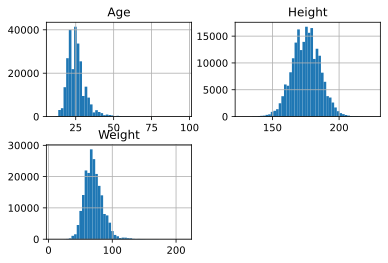

In [33]:
data[["Age", "Height", "Weight"]].hist(bins=50)

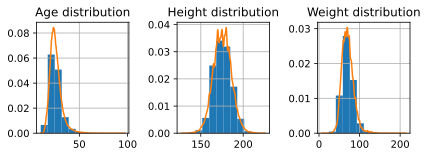

In [34]:
# Let's look at histograms with empirical density functions

fig = plt.figure()
n = 1
for i, var_name in zip([data["Age"].dropna(), data["Height"].dropna(), data["Weight"].dropna()], ["Age", "Height", "Weight"]):
    ax = fig.add_subplot(2, 3, n)
    i.hist(bins=12, density=True, ax=ax)
    ax.set_title(var_name + " distribution")
    density = kde.gaussian_kde(i)
    x = np.linspace(np.min(i), np.max(i), 300)
    y = density(x)
    plt.plot(x, y)
    n += 1
fig.tight_layout()
plt.show()

**Check if distribution is normal**

In [35]:
data_to_check = [data["Age"].dropna(), data["Height"].dropna(), data["Weight"].dropna()] 
name_list = ["Age", "Height", "Weight"]

ind = 0
for el in data_to_check:
    statistic, p = normaltest(el)
    alpha = 0.05
    print(f"Результаты теста на нормальность для признака {name_list[ind]}:\n statistic = {statistic}, p-value = "
          f"{p}")
    if p < alpha:
        print(f"Нулевая гипотеза может быть отклонена - распределение значений признака {name_list[ind]} "
              f"отличается от нормального")
    else:
        print(f"Принимаем нулевую гипотезу - распределение значений признака {name_list[ind]} нормальное")
    ind += 1

Результаты теста на нормальность для признака Age:
 statistic = 86296.57494853085, p-value = 0.0
Нулевая гипотеза может быть отклонена - распределение значений признака Age отличается от нормального
Результаты теста на нормальность для признака Height:
 statistic = 246.61301993305398, p-value = 2.8097206206636833e-54
Нулевая гипотеза может быть отклонена - распределение значений признака Height отличается от нормального
Результаты теста на нормальность для признака Weight:
 statistic = 26993.79194611333, p-value = 0.0
Нулевая гипотеза может быть отклонена - распределение значений признака Weight отличается от нормального


## Find out the age of the youngest athletes of both genders at the 1992 Olympics (task 3)

In [36]:
youngest_women = data[(data["Year"] == 1992) & (data["Sex"] == "F")]["Age"].min()
print(f"The age of youngest women at 1992 was {youngest_women} years")

The age of youngest women at 1992 was 12.0 years


In [37]:
youngest_men = data[(data["Year"] == 1992) & (data["Sex"] == "M")]["Age"].min()
print(f"The age of youngest men at 1992 was {youngest_men} years")

The age of youngest men at 1992 was 11.0 years


## Calculate the mean and the standard deviation of the Height variable for athletes of each gender (task 4)

In [38]:
women_height_mean = data[data["Sex"] == "F"]["Height"].mean()
women_height_sd = data[data["Sex"] == "F"]["Height"].std()
print(f"Mean height of women = {women_height_mean}, sd = {women_height_sd}")

Mean height of women = 167.8397275115392, sd = 8.77846330126294


In [39]:
men_height_mean = data[data["Sex"] == "M"]["Height"].mean()
men_height_sd = data[data["Sex"] == "M"]["Height"].std()
print(f"Mean height of men = {men_height_mean}, sd = {men_height_sd}")

Mean height of men = 178.85927572177016, sd = 9.36005976005523


## Calculate the mean value and standard deviation of the Height variable for female tennis players at the 2000 Olympics. Round the answer to the first character (task 5)

In [40]:
dict(data["Sport"].value_counts()).keys()

dict_keys(['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Fencing', 'Rowing', 'Cross Country Skiing', 'Alpine Skiing', 'Wrestling', 'Football', 'Sailing', 'Equestrianism', 'Canoeing', 'Boxing', 'Speed Skating', 'Ice Hockey', 'Hockey', 'Biathlon', 'Basketball', 'Weightlifting', 'Water Polo', 'Judo', 'Handball', 'Volleyball', 'Bobsleigh', 'Tennis', 'Diving', 'Ski Jumping', 'Archery', 'Figure Skating', 'Art Competitions', 'Table Tennis', 'Modern Pentathlon', 'Short Track Speed Skating', 'Luge', 'Badminton', 'Nordic Combined', 'Freestyle Skiing', 'Snowboarding', 'Synchronized Swimming', 'Baseball', 'Rhythmic Gymnastics', 'Taekwondo', 'Beach Volleyball', 'Triathlon', 'Softball', 'Curling', 'Rugby Sevens', 'Golf', 'Skeleton', 'Tug-Of-War', 'Rugby', 'Trampolining', 'Polo', 'Lacrosse', 'Alpinism', 'Cricket', 'Military Ski Patrol', 'Croquet', 'Motorboating', 'Racquets', 'Jeu De Paume', 'Roque', 'Basque Pelota', 'Aeronautics'])

In [41]:
women_height_mean_tennis = data[(data["Year"] == 2000) & (data["Sex"] == "F") & (data["Sport"] == "Tennis")]["Height"].mean()
women_height_sd_tennis = data[(data["Year"] == 2000) & (data["Sex"] == "F") & (data["Sport"] == "Tennis")]["Height"].std()
                          
print(f"Mean height of female tennis players = {women_height_mean_tennis}, sd = {women_height_sd_tennis}")

Mean height of female tennis players = 171.792, sd = 6.4586725890776675


## What kind of sport did the heaviest athlete participate in at the 2006 Olympics? (task 6)

In [42]:
max_weight = data[data["Year"] == 2006]["Weight"].max()
data[(data["Year"] == 2006) & (data["Weight"] == max_weight)]["Sport"]                            

8102    Skeleton
Name: Sport, dtype: object

## How many gold medals were won by women from 1980 to 2010? (task 7)

In [43]:
gold_medals_number = data[(data["Year"].isin(range(1980, 2011))) & (data["Sex"] == "F") & (data["Medal"] == "Gold")].shape[0]
gold_medals_number

2249

## How many times did John Aalberg compete in the Olympic Games in different years? (task 8)

In [44]:
# count all competitions, including ones in different disciplines
john_aalberg_participations = data[data["Name"] == "John Aalberg"].shape[0]
john_aalberg_participations

8

In [45]:
# count, how many times John Aalberg competed in each year
selected_data = data[data["Name"] == "John Aalberg"]
result = selected_data.groupby(["Name","Year"]).size()
result

Name          Year  
John Aalberg  1992.0    4
              1994.0    4
dtype: int64

## Determine the least and most represented (by the number of participants) age groups of athletes at the 2008 Olympic Games. Possible age groups: [15-25), [25-35), [35-45), [45-55] (task 9)

In [46]:
n_1 = data[(data["Age"].isin(range(15, 25))) & (data["Year"] == 2008)].shape[0]
n_2 = data[(data["Age"].isin(range(25, 35))) & (data["Year"] == 2008)].shape[0]
n_3 = data[(data["Age"].isin(range(35, 45))) & (data["Year"] == 2008)].shape[0]
n_4 = data[(data["Age"].isin(range(45, 56))) & (data["Year"] == 2008)].shape[0]
print(f"Number of participants in each age group\nGroup_1: {n_1}\nGroup_2: {n_2}\nGroup_3: {n_3}\nGroup_4: {n_4}\n")

Number of participants in each age group
Group_1: 6294
Group_2: 6367
Group_3: 790
Group_4: 119



The most represented group is [25-35), the least represented is [45-55] group.

## How much has the number of sports at the 2002 Olympics changed compared to The 1994 Olympic Games? (task 10)

In [47]:
first = data[data["Year"] == 1994]["Sport"].unique()
first

array(['Speed Skating', 'Cross Country Skiing', 'Biathlon',
       'Alpine Skiing', 'Nordic Combined', 'Luge', 'Ice Hockey',
       'Figure Skating', 'Bobsleigh', 'Ski Jumping',
       'Short Track Speed Skating', 'Freestyle Skiing'], dtype=object)

In [48]:
second = data[data["Year"] == 2002]["Sport"].unique()
second

array(['Ice Hockey', 'Alpine Skiing', 'Cross Country Skiing', 'Luge',
       'Freestyle Skiing', 'Speed Skating', 'Figure Skating',
       'Nordic Combined', 'Bobsleigh', 'Ski Jumping', 'Biathlon',
       'Skeleton', 'Short Track Speed Skating', 'Snowboarding', 'Curling'],
      dtype=object)

In [49]:
difference = len(second) - len(first)
print(f"At the 2002 Olympics there were {difference} more sports compared to the 1994 Olympic Games")

At the 2002 Olympics there were 3 more sports compared to the 1994 Olympic Games


## Show for the Winter and Summer Olympics separately the top 3 countries for each of the types of medals (task 11)

In [50]:
all_results = data.groupby(["Season", "Medal", "Team"], as_index=False).size() # .nlargest(2, columns=["size"])

In [51]:
all_results[(all_results["Season"] == "Summer") & 
            (all_results["Medal"] == "Gold")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)

,Season,Medal,Team,size
0,Summer,Gold,United States,2333
1,Summer,Gold,Soviet Union,830
2,Summer,Gold,Germany,564


In [52]:
all_results[(all_results["Season"] == "Summer") & 
            (all_results["Medal"] == "Silver")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)

,Season,Medal,Team,size
0,Summer,Silver,United States,1241
1,Summer,Silver,Soviet Union,635
2,Summer,Silver,Great Britain,576


In [53]:
all_results[(all_results["Season"] == "Summer") & 
            (all_results["Medal"] == "Bronze")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)


,Season,Medal,Team,size
0,Summer,Bronze,United States,1112
1,Summer,Bronze,Germany,610
2,Summer,Bronze,Soviet Union,596


In [54]:
all_results[(all_results["Season"] == "Winter") & 
            (all_results["Medal"] == "Gold")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)


,Season,Medal,Team,size
0,Winter,Gold,Canada,289
1,Winter,Gold,Soviet Union,228
2,Winter,Gold,Norway,151


In [55]:
all_results[(all_results["Season"] == "Winter") & 
            (all_results["Medal"] == "Silver")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)

,Season,Medal,Team,size
0,Winter,Silver,United States,271
1,Winter,Silver,Canada,189
2,Winter,Silver,Norway,165


In [56]:
all_results[(all_results["Season"] == "Winter") & 
            (all_results["Medal"] == "Bronze")].sort_values(by=["size"], ascending=False).head(3).reset_index(drop=True)

,Season,Medal,Team,size
0,Winter,Bronze,Finland,215
1,Winter,Bronze,Sweden,177
2,Winter,Bronze,Norway,127


## Create a new variable Height_z_scores and save the values of the Height variable to it after standardization (task 12)

In [57]:
mean_value = data["Height"].mean()
mean_value

175.33896593414408

In [58]:
sd = data["Height"].std()
sd

10.518556013888055

In [59]:
height_z_scores = (data["Height"] - mean_value) / sd
height_z_scores.head()

0    0.443125
1   -0.507576
2         NaN
3         NaN
4    0.918475
Name: Height, dtype: float64

## Optional: Create a new variable Height_min_max_scaled and store the values of the variable Height into it after applying min-max normalization (task 13)

In [60]:
height_min_max_scaled = (data["Height"] - data["Height"].min()) / (data["Height"].max() - data["Height"].min())
height_min_max_scaled.head()

0    0.535354
1    0.434343
2         NaN
3         NaN
4    0.585859
Name: Height, dtype: float64

## Compare the height, weight and age of men and women participating in winter Olympic Games. Please format the results so that we can immediately use them for an article (task 14)

Text(0.5, 1.05, 'Female and male distributions')

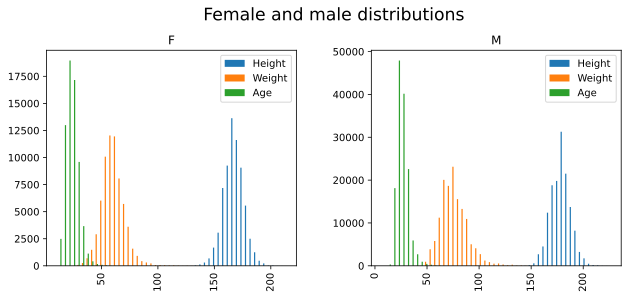

In [61]:
data.hist(bins=50, column=["Height", "Weight", "Age"], by="Sex", legend=True, figsize=(10, 4))
plt.suptitle("Female and male distributions", x=0.5, y=1.05, ha='center', fontsize='xx-large')

**Is there a difference in height between men and women?**

In [62]:
# Check if variances are equal

from scipy.stats import levene

In [63]:
levene_stat_1, levene_p_1 = levene(data[(data["Sex"] == "F") & (data["Season"] == "Winter")]["Height"].dropna(), 
                                   data[(data["Sex"] == "M") & (data["Season"] == "Winter")]["Height"].dropna())

print(f"Levene's test statistic: {levene_stat_1}")
print(f"P-value: {levene_p_1}")

Levene's test statistic: 102.98092428921892
P-value: 3.6185179595010145e-24


p-value < 0.05 suggests that the populations do not have equal variances, which means we should perform Welch’s t-test, which does not assume equal population variance

In [64]:
from scipy.stats import ttest_ind

# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values

In [65]:
t_stat_1, p_1 = ttest_ind(data[(data["Sex"] == "M") & (data["Season"] == "Winter")]['Height'], 
                          data[(data["Sex"] == "F") & (data["Season"] == "Winter")]['Height'], 
                          nan_policy="omit", equal_var=False, axis=None)
 
print("p_value: ", p_1)

p_value:  0.0


p-value < 0.05, and we reject H0. The average heigh is different in men and women.

**Is there a difference in weight between men and women?**

In [66]:
# Check if variances are equal

levene_stat_2, levene_p_2 = levene(data[(data["Sex"] == "F") & (data["Season"] == "Winter")]["Weight"].dropna(), 
                                   data[(data["Sex"] == "M") & (data["Season"] == "Winter")]["Weight"].dropna())

print(f"Levene's test statistic: {levene_stat_2}")
print(f"P-value: {levene_p_2}")

Levene's test statistic: 1855.256260517916
P-value: 0.0


p-value < 0.05 suggests that the populations do not have equal variances, which means we should perform Welch’s t-test, which does not assume equal population variance

In [67]:
t_stat_2, p_2 = ttest_ind(data[(data["Sex"] == "M") & (data["Season"] == "Winter")]['Weight'], 
                          data[(data["Sex"] == "F") & (data["Season"] == "Winter")]['Weight'], 
                          nan_policy="omit", equal_var=False, axis=None)
 
print("p_value: ", p_2)

p_value:  0.0


p-value < 0.05, and we reject H0. The average weight is different in men and women.

**Is there a difference in age between men and women?**

In [68]:
# Check if variances are equal

levene_stat_3, levene_p_3 = levene(data[(data["Sex"] == "F") & (data["Season"] == "Winter")]["Age"].dropna(), 
                                   data[(data["Sex"] == "M") & (data["Season"] == "Winter")]["Age"].dropna())

print(f"Levene's test statistic: {levene_stat_3}")
print(f"P-value: {levene_p_3}")

Levene's test statistic: 7.463843105591014
P-value: 0.0062973353720409105


p-value < 0.05 suggests that the populations do not have equal variances, which means we should perform Welch’s t-test, which does not assume equal population variance

In [69]:
t_stat_3, p_3 = ttest_ind(data[(data["Sex"] == "F") & (data["Season"] == "Winter")]["Age"], 
                          data[(data["Sex"] == "M") & (data["Season"] == "Winter")]["Age"], 
                          nan_policy="omit", axis=None, equal_var=False)
 
print("p_value: ", p_3)

p_value:  3.951040749173148e-224


p-value < 0.05, and we reject H0. The average age is different in men and women.

**Create summary table**

In [70]:
d = {"levene_stat": [levene_stat_1, levene_stat_2, levene_stat_3], 
     "levene_p_value": [levene_p_1, levene_p_2, levene_p_3], 
     "t-test_used": ["Welch’s t-test", "Welch’s t-test", "Welch’s t-test"], 
     "t_stat": [t_stat_1, t_stat_2, t_stat_3], 
     "p_value": [p_1, p_2, p_3], 
     "mean_values_are_different": [True, True, True]}
df = pd.DataFrame(data=d, index=["Height", "Weight", "Age"])
df

,levene_stat,levene_p_value,t-test_used,t_stat,p_value,mean_values_are_different
Height,102.980924,3.618518e-24,Welch’s t-test,184.796393,0.000000e+00,True
Weight,1855.256261,0.000000e+00,Welch’s t-test,187.846152,0.000000e+00,True
Age,7.463843,6.297335e-03,Welch’s t-test,-32.239148,3.951041e-224,True


## We are especially interested in the Team and Medal variables. What can you say about them to tell? Do we have reason to believe that they may be related? How did you define it? (task 15)

In [71]:
from scipy.stats import chi2_contingency

In [72]:
# create crosstabulation of Tean and Medal variables

crosstab = pd.crosstab(index=data["Team"],columns=data["Medal"])
crosstab

Medal,Bronze,Gold,No medal,Silver
Team,,,,
30. Februar,0,0,2,0
A North American Team,4,0,0,0
Acipactli,0,0,3,0
Acturus,0,0,2,0
Afghanistan,2,0,124,0
...,...,...,...,...
Zambia,1,0,181,1
Zefyros,0,0,2,0
Zimbabwe,1,17,287,4


**Perform Chi-squared test to determine if there is a correlation between two variables**

H0: two variables are not correlated - they are independent.

In [73]:
result = chi2_contingency(crosstab)
 
print('The p-value of the ChiSq test is:', result[1])

The p-value of the ChiSq test is: 0.0


p -value is less than 0.05. So, we can reject the null hypothesis that the two variables (Team and Medal) are independent.
They are correlated with each other.

## It is necessary to put forward and test several hypotheses within the framework of the methods that we have learned (everything that you will find interesting). There is no correct solution here, your ability to apply learned methods and interpret findings results will be evaluated (task 16)

**H0: Winter Olympic athletes weigh is the same as the weight of Summer Olympic athletes**

In [74]:
winter_athlets = data[data["Season"] == "Winter"]["Weight"].dropna()
summer_athlets = data[data["Season"] == "Summer"]["Weight"].dropna()

In [75]:
# look at mean weight in the groups

print("Winter athlets mean weight", winter_athlets.mean())
print("Summer athlets mean weight", summer_athlets.mean())


Winter athlets mean weight 70.75927471360292
Summer athlets mean weight 70.68873143399246


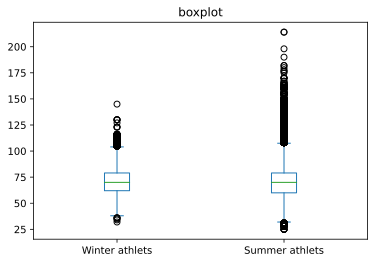

In [77]:
# look at boxplot

data_ = pd.DataFrame({"Winter athlets": winter_athlets, "Summer athlets": summer_athlets})
ax = data_[["Winter athlets", "Summer athlets"]].plot(kind='box', title='boxplot')
plt.show()

In [79]:
# check if values are distributed normally among winter athlets

statistic, p = normaltest(winter_athlets)
statistic, p

(917.3847812348373, 6.200487893100195e-200)

In [80]:
# check if values are distributed normally among summer athlets

statistic, p = normaltest(summer_athlets)
statistic, p

(23869.081836815363, 0.0)

In both cases data is not distributed normally. We are going to use the Mann-Whitney U test.

In [81]:
U1, p = mannwhitneyu(winter_athlets, summer_athlets, method="auto", alternative='two-sided')
nx, ny = len(winter_athlets), len(summer_athlets)
U2 = nx*ny - U1

print(U1)
print(U2)
print(p)

3412514919.0
3256609746.0
4.196449048076788e-13


p < 0.05, so we reject Ho.

**H0: Female athlets in the USSR were the same age as men**

In [94]:
female = data[(data["Sex"] == "F") & (data["Team"] == "Soviet Union")]["Age"].dropna()
male = data[(data["Sex"] == "M") & (data["Team"] == "Soviet Union")]["Age"].dropna()

In [95]:
# look at mean age in the groups

print("Female athlets mean age", female.mean())
print("Male athlets mean age", male.mean())

Female athlets mean age 23.521598968407478
Male athlets mean age 25.381283836040218


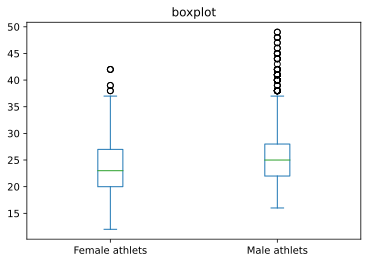

In [96]:
# look at boxplot

data_2 = pd.DataFrame({"Female athlets": female, "Male athlets": male})
ax = data_2[["Female athlets", "Male athlets"]].plot(kind='box', title='boxplot')
plt.show()

In [97]:
# check if values are distributed normally among female

statistic, p = normaltest(female)
statistic, p

(41.269032257140594, 1.0928071016294732e-09)

In [98]:
# check if values are distributed normally among female

statistic, p = normaltest(male)
statistic, p

(636.0121651495272, 7.793151626348368e-139)

In [ ]:
In both cases data is not distributed normally. We are going to use the Mann-Whitney U test.

In [99]:
U1, p = mannwhitneyu(female, male, method="auto", alternative='two-sided')
nx, ny = len(female), len(male)
U2 = nx*ny - U1

print(U1)
print(U2)
print(p)

2366826.5
3649502.5
7.20066745063058e-35


p < 0.05, so we reject Ho.

**H0: Sex and Medal variables are not correlated - they are independent.**

Perform Chi-squared test to determine if there is a correlation between two variables

In [100]:
# create crosstabulation of Tean and Medal variables

crosstab_ = pd.crosstab(index=data["Sex"],columns=data["Medal"])
crosstab_

Medal,Bronze,Gold,No medal,Silver
Sex,,,,
F,3771,3747,63126,3735
M,9524,9622,166831,9372


In [101]:
result_ = chi2_contingency(crosstab_)
 
print('The p-value of the ChiSq test is:', result_[1])

The p-value of the ChiSq test is: 0.004974412944074657


p -value is less than 0.05. So, we can reject the null hypothesis that the two variables (Sex and Medal) are independent. They are correlated with each other.